In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fancyimpute import IterativeImputer
from fancyimpute import KNN

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading the dataset
pd.set_option('max_columns', None)
data = pd.read_csv('telecom_churn_data.csv')

In [3]:
# First Five rows
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Last Five rows
data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [5]:
data.shape

(99999, 226)

In [6]:
# Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# Data Description
data_dictionary = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')

In [8]:
data_dictionary

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


## Handling missing values

In [9]:
# Filling some columns with 0
data['total_rech_data_6'] = data['total_rech_data_6'].fillna(value = 0)
data['total_rech_data_7'] = data['total_rech_data_7'].fillna(value = 0)
data['total_rech_data_8'] = data['total_rech_data_8'].fillna(value = 0)
data['total_rech_data_9'] = data['total_rech_data_9'].fillna(value = 0)
data['av_rech_amt_data_6'] = data['av_rech_amt_data_6'].fillna(value = 0)
data['av_rech_amt_data_7'] = data['av_rech_amt_data_7'].fillna(value = 0)
data['av_rech_amt_data_8'] = data['av_rech_amt_data_8'].fillna(value = 0)
data['av_rech_amt_data_9'] = data['av_rech_amt_data_9'].fillna(value = 0)

### Total Data recharge amount

### Derived Variable

In [10]:
# Total Data recharge amount
data['total_rech_data_amt_6'] = data['total_rech_data_6']* data['av_rech_amt_data_6']
data['total_rech_data_amt_7'] = data['total_rech_data_7']* data['av_rech_amt_data_7']
data['total_rech_data_amt_8'] = data['total_rech_data_8']* data['av_rech_amt_data_8']
data['total_rech_data_amt_9'] = data['total_rech_data_9']* data['av_rech_amt_data_9']

In [11]:
# Percentage of missing values
missing_percentage = (data.isnull().sum()/len(data))*100
missing_percentage = pd.DataFrame(missing_percentage, columns = ['Missing Percentage'])
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Features','Missing Percentage']
missing_percentage.head()

,Features,Missing Percentage
0,mobile_number,0.00000
1,circle_id,0.00000
2,loc_og_t2o_mou,1.01801
3,std_og_t2o_mou,1.01801
4,loc_ic_t2o_mou,1.01801


#### We can see that the data contains some missing values

### We will simply drop columns with missing value percentage more than 70 percent

In [12]:
more_than_70 = missing_percentage[missing_percentage['Missing Percentage'] > 70]
high_missing_val = list(more_than_70['Features'])
data.drop(high_missing_val,axis = 1, inplace = True)

In [13]:
# Percentage of missing values
missing_percentage = (data.isnull().sum()/len(data))*100
missing_percentage = pd.DataFrame(missing_percentage, columns = ['Missing Percentage'])
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Features','Missing Percentage']
missing_percentage.head()

,Features,Missing Percentage
0,mobile_number,0.00000
1,circle_id,0.00000
2,loc_og_t2o_mou,1.01801
3,std_og_t2o_mou,1.01801
4,loc_ic_t2o_mou,1.01801


In [14]:
# Shape
missing_percentage.shape

(198, 2)

In [15]:
# Columns with less 10 percent of data missing
less_than_10 = missing_percentage[missing_percentage['Missing Percentage']>0]
print(list(less_than_10['Features']))

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t

In [16]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,0.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.7

In [17]:
# Dropping columns that does not help in model process
data.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],1,inplace = True)

In [18]:
# Dropping columns with same values 
data.drop(['std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_t2c_mou_9'],1,inplace = True)

In [19]:
# Dropping columns that does not help in model process
data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9'],1,inplace = True)

In [20]:
# Dividing the columns into numerical and categorical columns
num_col = [col for col in data.columns
          if data[col].dtype in ['int64','float64']]
cat_col = [col for col in data.columns
          if data[col].dtype in ['object']]

In [21]:
# Percentage of missing values
missing_percentage = (data.isnull().sum()/len(data))*100
missing_percentage = pd.DataFrame(missing_percentage, columns = ['Missing Percentage'])
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Features','Missing Percentage']
missing_percentage.head()

,Features,Missing Percentage
0,mobile_number,0.00000
1,circle_id,0.00000
2,loc_og_t2o_mou,1.01801
3,std_og_t2o_mou,1.01801
4,loc_ic_t2o_mou,1.01801


In [22]:
# Columns with less than 10 percent of data missing
less_than_10 = missing_percentage[missing_percentage['Missing Percentage']>0]
print(list(less_than_10['Features']))

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2t_mou_9', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2m_mou_9', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2f_mou_9', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_og_mou_9

In [23]:
# Shape of missing value data less than 10 percent
less_than_10.shape

(115, 2)

In [24]:
data_dictionary

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [25]:
# Columns with missing data between 5 to 7 percent
between_5_to_7 = missing_percentage[(missing_percentage['Missing Percentage']>5) & (missing_percentage['Missing Percentage']<8)]
missing_col_57 = list(between_5_to_7['Features'])

In [26]:
# Shape of missing data between 5 to 7 percent
between_5_to_7.shape

(56, 2)

### Using Fancy Impute

In [27]:
# Using Fancy Imputer to impute the values
fancy = IterativeImputer()
X_ii = pd.DataFrame(fancy.fit_transform(data[missing_col_57]))

In [28]:
# Applying the columns names
X_ii.columns = missing_col_57

In [29]:
X_ii.head()

,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9
0,0.00,128.893683,0.00,189.951813,0.00,-1.182928,0.00,6.580426,0.00,44.586493,0.00,90.463294,0.00,3.655084,0.00,1.146945,0.00,138.709781,0.00,82.345278,0.00,86.275783,0.00,1.042252,0.00,169.66505,0.0,1.121779,0.00,3.814494,0.0,0.033745,0.16,46.284337,4.13,106.155336,1.15,12.17323,5.44,164.619189,0.00,9.433625,0.00,19.620892,0.00,2.173395,0.0,0.0,0.00,31.22935,0.0,0.131325,0.0,3.171137,0.0,0.534408
1,7.68,18.340000,304.76,53.760000,0.00,0.000000,0.00,0.000000,7.68,18.340000,291.86,53.760000,0.00,0.000000,0.00,0.000000,299.54,72.110000,0.00,0.000000,0.13,0.000000,0.00,0.000000,0.13,0.00000,0.0,0.000000,12.76,0.000000,0.0,0.000000,29.23,116.090000,375.58,56.930000,3.61,0.00000,408.43,173.030000,2.35,0.000000,12.49,15.010000,0.00,0.000000,0.0,0.0,14.84,15.01000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,37.26,74.810000,208.36,118.910000,0.00,38.490000,0.00,70.940000,13.58,14.390000,38.46,28.160000,15.61,22.240000,45.76,0.480000,67.66,64.810000,22.58,8.760000,75.53,9.280000,22.83,0.000000,120.94,18.04000,0.0,0.000000,96.84,42.080000,0.0,0.000000,67.46,148.230000,38.89,38.980000,49.63,158.19000,155.99,345.410000,28.69,49.440000,167.09,118.180000,43.23,3.860000,0.0,0.0,239.03,171.49000,0.0,0.450000,0.0,0.010000,0.0,0.360000
3,310.98,241.710000,71.68,113.540000,44.38,0.000000,39.04,0.000000,10.61,15.490000,22.46,65.460000,4.91,2.060000,0.00,0.000000,37.99,83.030000,289.58,226.210000,6.53,9.990000,0.00,0.000000,296.11,236.21000,0.0,0.000000,18.09,43.290000,0.0,0.000000,8.04,41.730000,20.28,52.860000,19.84,65.59000,48.18,160.190000,0.00,129.840000,4.94,13.980000,0.00,0.000000,0.0,0.0,4.94,143.83000,0.0,0.550000,0.0,0.000000,0.0,0.800000
4,83.89,58.780000,124.26,45.810000,0.00,0.000000,0.00,0.000000,83.89,58.780000,124.26,37.890000,0.00,1.930000,0.00,0.000000,208.16,98.610000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00000,0.0,0.000000,0.00,5.980000,0.0,0.000000,233.81,154.560000,104.13,48.240000,0.00,0.00000,337.94,202.810000,0.86,2.310000,0.00,0.000000,0.00,0.000000,0.0,0.0,0.86,2.31000,0.0,0.180000,0.0,0.000000,0.0,0.000000


In [30]:
# No missing values
X_ii.isnull().sum().any()

False

In [31]:
# Columns with missing value percentage less than 5 percent
between_0_and_5= missing_percentage[(missing_percentage['Missing Percentage'] <=5) & (missing_percentage['Missing Percentage'] > 0)]

missing_col_between_05 = list(between_0_and_5['Features'])

In [32]:
# Shape of the data having missing values between 0 to 5 percent.
between_0_and_5.shape

(59, 2)

In [33]:
# Checking missing values
data[missing_col_between_05].isnull().sum().any()

True

In [34]:
# Using Fancy Imputer to impute the values
fancy = IterativeImputer()
X1_ii = pd.DataFrame(fancy.fit_transform(data[missing_col_between_05]))

In [35]:
X1_ii.columns = missing_col_between_05

In [36]:
X1_ii.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_6,roam_og_mou_7,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_mou_6,loc_og_mou_7,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_mou_6,std_og_mou_7,isd_og_mou_6,isd_og_mou_7,spl_og_mou_6,spl_og_mou_7,og_others_6,og_others_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_mou_6,loc_ic_mou_7,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_mou_6,std_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,isd_ic_mou_6,isd_ic_mou_7,ic_others_6,ic_others_7
0,0.0,0.0,0.0,132.403752,133.681227,197.934521,197.061018,9.86877,7.075262,13.904326,9.820945,47.100789,46.473026,93.34209,91.397133,3.751013,3.792984,1.125742,1.368312,144.20118,141.670476,79.82987,83.299595,87.299624,90.804137,1.129011,1.11501,168.261219,175.221435,0.813114,0.814399,3.918689,4.97817,0.454899,0.030503,47.922398,47.990538,107.475647,107.120495,12.084307,12.599696,167.491065,167.719538,9.575997,10.011907,20.72224,21.656415,2.156397,2.216923,0.0,0.0,32.457179,33.887833,0.061382,0.033607,7.481845,8.377753,0.854639,1.014236
1,0.0,0.0,0.0,24.110000,78.680000,15.740000,99.840000,0.00000,0.000000,0.000000,0.000000,23.880000,74.560000,11.51000,75.940000,0.000000,0.000000,0.000000,2.910000,35.39000,150.510000,0.23000,4.110000,0.000000,0.460000,0.000000,0.00000,0.230000,4.580000,0.000000,0.000000,4.680000,23.43000,0.000000,0.000000,1.610000,29.910000,17.480000,65.380000,0.000000,8.930000,19.090000,104.230000,0.000000,0.000000,5.90000,0.000000,0.000000,0.000000,0.0,0.0,5.900000,0.000000,0.000000,0.000000,1.830000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,11.540000,55.240000,143.330000,220.590000,0.00000,0.000000,0.000000,0.000000,7.190000,28.740000,29.34000,16.860000,24.110000,21.790000,0.000000,135.540000,60.66000,67.410000,4.34000,26.490000,41.810000,67.410000,1.480000,14.76000,47.640000,108.680000,0.000000,0.000000,46.560000,236.84000,0.450000,0.000000,115.690000,71.110000,14.380000,15.440000,99.480000,122.290000,229.560000,208.860000,72.410000,71.290000,45.18000,177.010000,21.730000,58.340000,0.0,0.0,139.330000,306.660000,0.210000,0.000000,0.000000,0.850000,0.930000,3.140000
3,0.0,0.0,0.0,99.910000,54.390000,123.310000,109.010000,0.00000,54.860000,0.000000,28.090000,73.680000,34.810000,107.43000,83.210000,1.910000,0.650000,0.000000,0.000000,183.03000,118.680000,26.23000,14.890000,2.990000,1.730000,0.000000,0.00000,29.230000,16.630000,0.000000,0.000000,10.960000,0.00000,0.000000,0.000000,62.080000,19.980000,113.960000,64.510000,57.430000,27.090000,233.480000,111.590000,43.480000,66.440000,1.33000,38.560000,1.180000,0.000000,0.0,0.0,45.990000,105.010000,0.590000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,50.310000,149.440000,76.960000,91.880000,0.00000,0.000000,0.000000,0.000000,50.310000,149.440000,67.64000,91.880000,0.000000,0.000000,0.000000,0.000000,117.96000,241.330000,0.00000,0.000000,9.310000,0.000000,0.000000,0.00000,9.310000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,105.680000,88.490000,106.840000,109.540000,1.500000,0.000000,214.030000,198.040000,0.000000,0.000000,1.93000,0.250000,0.000000,0.000000,0.0,0.0,1.930000,0.250000,0.000000,0.000000,0.000000,0.000000,0.480000,0.000000


In [37]:
# Checking missing values after imputation
X1_ii.isnull().sum().any()

False

In [38]:
# Replacing the data with imputed data
data[missing_col_57] = X_ii
data[missing_col_between_05] = X1_ii

In [39]:
# Checking missing values after imputation
data.isnull().sum().any()

False

In [40]:
# Percentage of missing values
missing_percentage = (data.isnull().sum()/len(data))*100
missing_percentage = pd.DataFrame(missing_percentage, columns = ['Missing Percentage'])
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Features','Missing Percentage']
missing_percentage.head()

,Features,Missing Percentage
0,mobile_number,0.0
1,circle_id,0.0
2,loc_og_t2o_mou,0.0
3,std_og_t2o_mou,0.0
4,loc_ic_t2o_mou,0.0


In [41]:
# There are no missing values in our dataset
data.isnull().sum().any()

False

In [42]:
# Percentage of missing values
missing_percentage = (data.isnull().sum()/len(data))*100
missing_percentage = pd.DataFrame(missing_percentage, columns = ['Missing Percentage'])
missing_percentage = missing_percentage.reset_index()
missing_percentage.columns = ['Features','Missing Percentage']
missing_percentage.head()

,Features,Missing Percentage
0,mobile_number,0.0
1,circle_id,0.0
2,loc_og_t2o_mou,0.0
3,std_og_t2o_mou,0.0
4,loc_ic_t2o_mou,0.0


## EDA

In [43]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.403752,133.681227,0.00,128.893683,197.934521,197.061018,0.00,189.951813,9.86877,7.075262,0.00,-1.182928,13.904326,9.820945,0.00,6.580426,47.100789,46.473026,0.00,44.586493,93.34209,91.397133,0.00,90.463294,3.751013,3.792984,0.00,3.655084,1.125742,1.368312,0.00,1.146945,144.20118,141.670476,0.00,138.709781,79.82987,83.299595,0.00,82.345278,87.299624,90.804137,0.00,86.275783,1.129011,1.11501,0.00,1.042252,168.261219,175.221435,0.00,169.66505,0.813114,0.814399,0.0,1.121779,3.918689,4.97817,0.00,3.814494,0.454899,0.030503,0.0,0.033745,0.00,0.00,0.00,0.00,47.922398,47.990538,0.16,46.284337,107.475647,107.120495,4.13,106.155336,12.084307,12.599696,1.15,12.17323,167.491065,167.719538,5.44,164.619189,9.575997,10.011907,0.00,9.433625,20.72224,21.656415,0.00,19.620892,2.156397,2.216923,0.00,2.173395,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.22935,0.00,0.00,5.44,0.00,0.061382,0.033607,0.0,0.131325,7.481845,8.377753,0.0,3.171137,0.854639,1.014236,0.0,0.534408,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,0.0
1,7001865778,1

In [44]:
data_dictionary

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


<AxesSubplot:xlabel='onnet_mou_6', ylabel='arpu_6'>

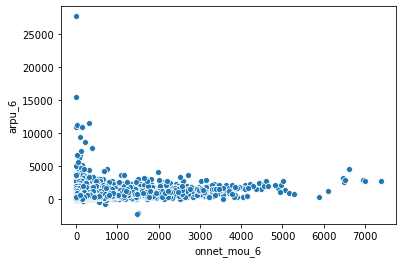

In [45]:
# Scatterplot between Avg Revenue per user_6 and Onnet_mou_6
sns.scatterplot(x = data['onnet_mou_6'], y = data['arpu_6'])

<AxesSubplot:xlabel='offnet_mou_6', ylabel='arpu_6'>

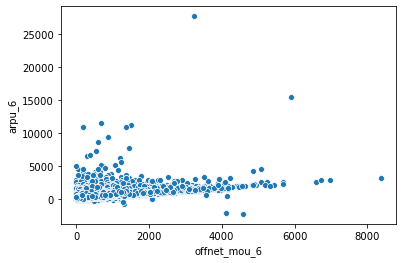

In [46]:
# Scatterplot between Avg Revenue per user_6 and Offnet_mou_6
sns.scatterplot(x = data['offnet_mou_6'], y = data['arpu_6'])

<AxesSubplot:xlabel='roam_ic_mou_6', ylabel='arpu_6'>

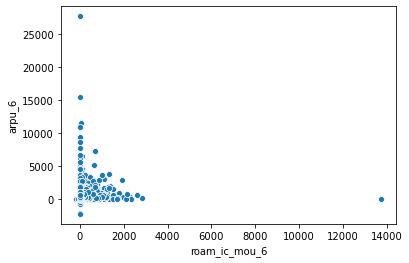

In [47]:
# we can see that 'roam_ic_mou_6' is used less by new customers
sns.scatterplot(x = data['roam_ic_mou_6'], y = data['arpu_6'])

<AxesSubplot:xlabel='roam_og_mou_6', ylabel='arpu_6'>

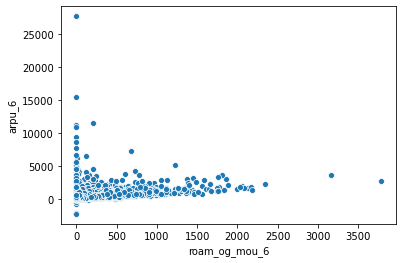

In [48]:
# We can see that roaming outgoing calls are done more as compared to incomming calls
sns.scatterplot(x = data['roam_og_mou_6'], y = data['arpu_6'])

<AxesSubplot:xlabel='total_rech_amt_6', ylabel='arpu_6'>

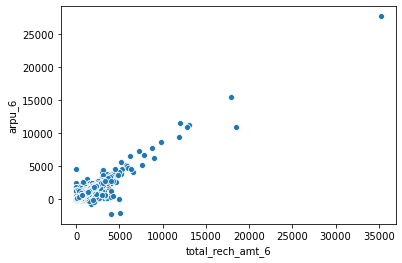

In [49]:
# We can see that there is a linear relation between Revenue per user and total recharge amount
sns.scatterplot(x = data['total_rech_amt_6'], y = data['arpu_6'])

<AxesSubplot:xlabel='vol_2g_mb_6', ylabel='vol_2g_mb_9'>

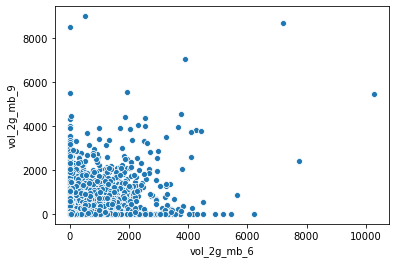

In [50]:
# Scatterplot between volume consumed in 6th month vs 9th month
sns.scatterplot(x = data['vol_2g_mb_6'], y = data['vol_2g_mb_9'])

<AxesSubplot:>

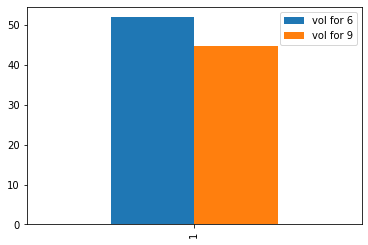

In [51]:
# We can clearly see that 2g volumne decreases when compared between month 6 and month 7.
vol_2g_67 = pd.DataFrame({'vol for 6': data['vol_2g_mb_6'].mean(),'vol for 9': data['vol_2g_mb_9'].mean()}, index = [1])
vol_2g_67.plot.bar()

<AxesSubplot:>

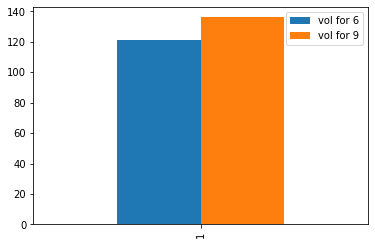

In [52]:
# Comparison between volume consumed in 6 th month vs 9 th month
vol_3g_67 = pd.DataFrame({'vol for 6': data['vol_3g_mb_6'].mean(),'vol for 9': data['vol_3g_mb_9'].mean()}, index = [1])
vol_3g_67.plot.bar()

<AxesSubplot:>

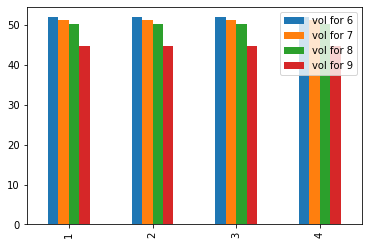

In [53]:
# We can see that the 2g vol decreses as the customer gets old
vol_2g = pd.DataFrame({'vol for 6': data['vol_2g_mb_6'].mean(),'vol for 7': data['vol_2g_mb_7'].mean(),
                            'vol for 8': data['vol_2g_mb_8'].mean(),'vol for 9': data['vol_2g_mb_9'].mean()},index = [1,2,3,4])
vol_2g.plot.bar()

<AxesSubplot:>

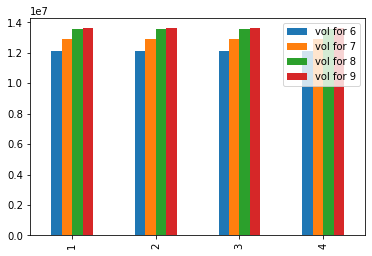

In [54]:
# We can see that 3g data volume increases as the customer gets old
vol_3g = pd.DataFrame({'vol for 6': data['vol_3g_mb_6'].sum(),'vol for 7': data['vol_3g_mb_7'].sum(),
                            'vol for 8': data['vol_3g_mb_8'].sum(),'vol for 9': data['vol_3g_mb_9'].sum()},index = [1,2,3,4])
vol_3g.plot.bar()

## Outlier Detection

<AxesSubplot:xlabel='total_rech_num_6'>

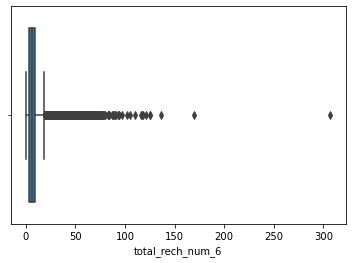

In [55]:
# Boxplot of Total recharge number for 6th month
sns.boxplot(data['total_rech_num_6'])

<AxesSubplot:xlabel='total_rech_num_6'>

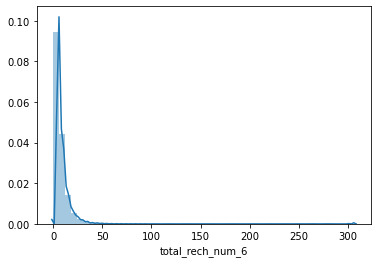

In [56]:
# We can see that the data is skewed
sns.distplot(data['total_rech_num_6'])

<AxesSubplot:xlabel='total_rech_amt_6'>

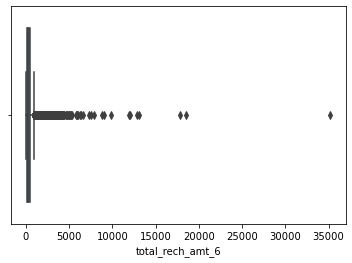

In [57]:
# Boxplot for Total recharge amount for 6th month
sns.boxplot(data['total_rech_amt_6'])

<AxesSubplot:xlabel='total_rech_amt_6'>

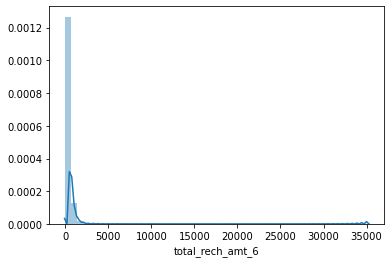

In [58]:
# Ditributon for Total recharge amount for the month 6th 
sns.distplot(data['total_rech_amt_6'])

<AxesSubplot:xlabel='max_rech_amt_6'>

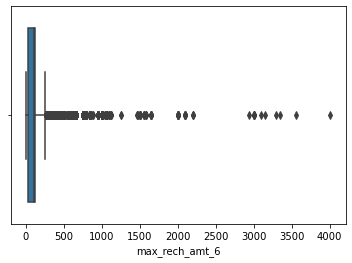

In [59]:
# Boxplot for the Maximum reacharge amount for the month 6
sns.boxplot(data['max_rech_amt_6'])

<AxesSubplot:xlabel='last_day_rch_amt_6'>

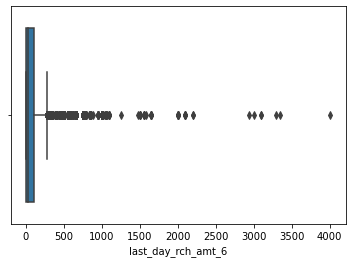

In [60]:
# Boxplot for Last day recharge amount for the 6th month
sns.boxplot(data['last_day_rch_amt_6'])

<AxesSubplot:xlabel='vol_2g_mb_6'>

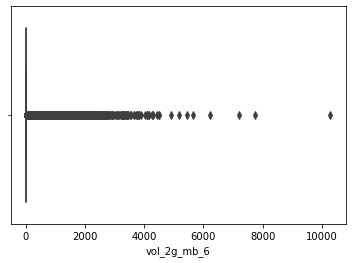

In [61]:
# Boxplot for 2g volumne of 6 th month
sns.boxplot(data['vol_2g_mb_6'])

<AxesSubplot:xlabel='vol_3g_mb_6'>

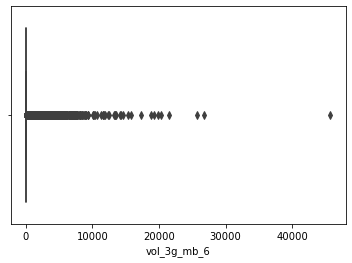

In [62]:
# Boxplot for 3g volumne for 6th month
sns.boxplot(data['vol_3g_mb_6'])

## Filtering High value customers

In [63]:
# Total recharge amount for 6th and 7th month
data['Total recharge amount_6'] = (data['total_rech_data_amt_6'] + data['total_rech_amt_6'])
data['Total recharge amount_7'] = (data['total_rech_data_amt_7'] + data['total_rech_amt_7'])

In [64]:
# Average recharge amount for 6th and 7th month
data['Average rechage for 6 and 7'] = (data['Total recharge amount_6'] + data['Total recharge amount_7'])/2

In [65]:
# Filtering the data for more than 70 percentile of Average recharge amount for 6th and 7th month
data_hvc = data[data['Average rechage for 6 and 7'] > data['Average rechage for 6 and 7'].quantile(0.70)]

In [66]:
# Shape
data_hvc.shape

(29953, 189)

In [67]:
data_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,Total recharge amount_6,Total recharge amount_7,Average rechage for 6 and 7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.403752,133.681227,0.00,128.893683,197.934521,197.061018,0.00,189.951813,9.86877,7.075262,0.00,-1.182928,13.904326,9.820945,0.00,6.580426,47.100789,46.473026,0.00,44.586493,93.34209,91.397133,0.00,90.463294,3.751013,3.792984,0.00,3.655084,1.125742,1.368312,0.00,1.146945,144.20118,141.670476,0.00,138.709781,79.82987,83.299595,0.00,82.345278,87.299624,90.804137,0.00,86.275783,1.129011,1.11501,0.00,1.042252,168.261219,175.221435,0.00,169.66505,0.813114,0.814399,0.00,1.121779,3.918689,4.97817,0.00,3.814494,0.454899,0.030503,0.0,0.033745,0.00,0.00,0.00,0.00,47.922398,47.990538,0.16,46.284337,107.475647,107.120495,4.13,106.155336,12.084307,12.599696,1.15,12.173230,167.491065,167.719538,5.44,164.619189,9.575997,10.011907,0.00,9.433625,20.72224,21.656415,0.00,19.620892,2.156397,2.216923,0.00,2.173395,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.229350,0.00,0.00,5.44,0.00,0.061382,0.033607,0.0,0.131325,7.481845,8.377753,0.00,3.171137,0.854639,1.014236,0.00,0.534408,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0

## Deriving churn 

In [68]:
data_hvc['total call usage_9'] = data_hvc['total_og_mou_9'] + data_hvc['total_ic_mou_9']
data_hvc['total data usage_9'] = data_hvc['vol_2g_mb_9'] + data_hvc['vol_3g_mb_9']

In [69]:
def churn(df):
    if df['total call usage_9'] == 0 and df['total data usage_9'] == 0:
        return 1  
    else:
        return 0
    
data_hvc['Churn'] = data_hvc.apply(churn,axis = 1)    

In [70]:
data_hvc['Churn']

0        1
7        1
8        0
21       0
23       0
        ..
99981    0
99984    0
99986    0
99988    0
99997    0
Name: Churn, Length: 29953, dtype: int64

In [71]:
data_hvc.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,Total recharge amount_6,Total recharge amount_7,Average rechage for 6 and 7,total call usage_9,total data usage_9,Churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.403752,133.681227,0.00,128.893683,197.934521,197.061018,0.00,189.951813,9.86877,7.075262,0.00,-1.182928,13.904326,9.820945,0.00,6.580426,47.100789,46.473026,0.00,44.586493,93.34209,91.397133,0.00,90.463294,3.751013,3.792984,0.00,3.655084,1.125742,1.368312,0.00,1.146945,144.20118,141.670476,0.00,138.709781,79.82987,83.299595,0.00,82.345278,87.299624,90.804137,0.00,86.275783,1.129011,1.11501,0.00,1.042252,168.261219,175.221435,0.00,169.66505,0.813114,0.814399,0.00,1.121779,3.918689,4.97817,0.00,3.814494,0.454899,0.030503,0.0,0.033745,0.00,0.00,0.00,0.00,47.922398,47.990538,0.16,46.284337,107.475647,107.120495,4.13,106.155336,12.084307,12.599696,1.15,12.173230,167.491065,167.719538,5.44,164.619189,9.575997,10.011907,0.00,9.433625,20.72224,21.656415,0.00,19.620892,2.156397,2.216923,0.00,2.173395,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.229350,0.00,0.00,5.44,0.00,0.061382,0.033607,0.0,0.131325,7.481845,8.377753,0.00,3.171137,0.854639,1.014236,0.00,0.534408,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.

In [72]:
# Checking class imbalance
data_hvc.Churn.value_counts()

0    27520
1     2433
Name: Churn, dtype: int64

In [73]:
# Churn Percentage
len(data_hvc[data_hvc['Churn'] == 1])/len(data_hvc)*100

8.122725603445398

### We can se that about 8.12 percent of customer churn from high value customers

## Removing all the attributes corrosponding to churn phase

In [74]:
# List all columns to be removed
churn_9_att = ['arpu_9','onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9',
              'loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2f_mou_9','std_og_mou_9','isd_og_mou_9',
             'spl_og_mou_9','og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9','std_ic_t2t_mou_9',
              'std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','std_ic_mou_9','total_ic_mou_9','spl_ic_mou_9','ic_others_9',
              'total_rech_num_9','total_rech_amt_9','max_rech_amt_9','last_day_rch_amt_9','total_rech_data_9','vol_2g_mb_9','vol_3g_mb_9',
              'vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9','sep_vbc_3g','total_rech_data_amt_9',
              'total call usage_9','total data usage_9','av_rech_amt_data_9','std_og_t2m_mou_9']

In [75]:
# Columns
list(data_hvc.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6'

In [76]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9,Total recharge amount_6,Total recharge amount_7,Average rechage for 6 and 7
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,132.403752,133.681227,0.00,128.893683,197.934521,197.061018,0.00,189.951813,9.86877,7.075262,0.00,-1.182928,13.904326,9.820945,0.00,6.580426,47.100789,46.473026,0.00,44.586493,93.34209,91.397133,0.00,90.463294,3.751013,3.792984,0.00,3.655084,1.125742,1.368312,0.00,1.146945,144.20118,141.670476,0.00,138.709781,79.82987,83.299595,0.00,82.345278,87.299624,90.804137,0.00,86.275783,1.129011,1.11501,0.00,1.042252,168.261219,175.221435,0.00,169.66505,0.813114,0.814399,0.0,1.121779,3.918689,4.97817,0.00,3.814494,0.454899,0.030503,0.0,0.033745,0.00,0.00,0.00,0.00,47.922398,47.990538,0.16,46.284337,107.475647,107.120495,4.13,106.155336,12.084307,12.599696,1.15,12.17323,167.491065,167.719538,5.44,164.619189,9.575997,10.011907,0.00,9.433625,20.72224,21.656415,0.00,19.620892,2.156397,2.216923,0.00,2.173395,0.0,0.0,0.0,0.0,32.457179,33.887833,0.00,31.22935,0.00,0.00,5.44,0.00,0.061382,0.033607,0.0,0.131325,7.481845,8.377753,0.0,3.171137,0.854639,1.014236,0.0,0.534408,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1

In [77]:
# Shape before removing
data_hvc.shape

(29953, 192)

In [78]:
# Dropping the columns
data_hvc.drop(churn_9_att,1,inplace = True)

In [79]:
# Shape after removing
data_hvc.shape

(29953, 148)

In [80]:
# Saving the mobile numbers of the customer
mobile_num = data_hvc['mobile_number']

In [81]:
# Dropping some other unnecessary columns
val = ['mobile_number','circle_id','Average rechage for 6 and 7','total_rech_amt_6','total_rech_amt_7','total_rech_data_6',
      'av_rech_amt_data_6','total_rech_data_7','av_rech_amt_data_7']
data_hvc.drop(val,1,inplace = True)

In [82]:
# After dropping columns
data_hvc.shape

(29953, 139)

In [83]:
# Head
data_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,Total recharge amount_6,Total recharge amount_7,Churn
0,0.0,0.0,0.0,197.385,214.816,213.803,132.403752,133.681227,0.00,197.934521,197.061018,0.00,9.86877,7.075262,0.00,13.904326,9.820945,0.00,47.100789,46.473026,0.00,93.34209,91.397133,0.00,3.751013,3.792984,0.00,3.655084,1.125742,1.368312,0.00,144.20118,141.670476,0.00,79.82987,83.299595,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,168.261219,175.221435,0.00,0.813114,0.814399,0.00,3.918689,4.97817,0.00,0.454899,0.030503,0.0,0.00,0.00,0.00,47.922398,47.990538,0.16,107.475647,107.120495,4.13,106.155336,12.084307,12.599696,1.15,167.491065,167.719538,5.44,9.575997,10.011907,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,0.0,0.0,0.0,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061382,0.033607,0.0,7.481845,8.377753,0.00,3.171137,0.854639,1.014236,0.00,4,3,2,252,252,252,252,252,252,252,1.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0,1
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.23000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.63000,447.380000,162.28,62.130000,55.140000,53.23,3.655272,0.000000,0.000000,0.00,422.16000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.00000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,106.155583,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,0.0,0.0,0.0,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,24.314536,15.740000,15.190000,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0,1
8,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,351.030000,35.08

In [84]:
# Dividing the data into dependent and independent variables
X = data_hvc.iloc[:,:-1]
y = data_hvc.pop('Churn')

In [85]:
# Independent variable
X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,Total recharge amount_6,Total recharge amount_7
0,0.0,0.0,0.0,197.385,214.816,213.803,132.403752,133.681227,0.00,197.934521,197.061018,0.00,9.86877,7.075262,0.00,13.904326,9.820945,0.00,47.100789,46.473026,0.00,93.34209,91.397133,0.00,3.751013,3.792984,0.00,3.655084,1.125742,1.368312,0.00,144.20118,141.670476,0.00,79.82987,83.299595,0.00,87.299624,90.804137,0.00,1.129011,1.11501,0.00,168.261219,175.221435,0.00,0.813114,0.814399,0.00,3.918689,4.97817,0.00,0.454899,0.030503,0.0,0.00,0.00,0.00,47.922398,47.990538,0.16,107.475647,107.120495,4.13,106.155336,12.084307,12.599696,1.15,167.491065,167.719538,5.44,9.575997,10.011907,0.00,20.72224,21.656415,0.00,2.156397,2.216923,0.00,0.0,0.0,0.0,32.457179,33.887833,0.00,0.00,0.00,5.44,0.061382,0.033607,0.0,7.481845,8.377753,0.00,3.171137,0.854639,1.014236,0.00,4,3,2,252,252,252,252,252,252,252,1.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,614.0,504.0
7,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.160000,325.91,16.23000,33.490000,31.64,23.740000,12.590000,38.06,51.390000,31.380000,40.28,308.63000,447.380000,162.28,62.130000,55.140000,53.23,3.655272,0.000000,0.000000,0.00,422.16000,533.910000,255.79,4.30000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.08000,16.68,60.860000,75.140000,77.84,0.000000,0.180000,10.01,4.500000,0.00000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.490000,121.19,106.155583,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.830000,30.39,91.44000,126.990000,141.33,52.190000,34.240000,22.21,0.0,0.0,0.0,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,24.314536,15.740000,15.190000,15.14,5,5,7,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1580.0,790.0
8,0.0,0.0,0.0,378.721,492.223,137.362,413.690000,351.030000,35.08,94.660000

In [86]:
# Dependent variable
y

0        1
7        1
8        0
21       0
23       0
        ..
99981    0
99984    0
99986    0
99988    0
99997    0
Name: Churn, Length: 29953, dtype: int64

In [87]:
# There is a data imbalance
y.value_counts(normalize=True)

0    0.918773
1    0.081227
Name: Churn, dtype: float64

## Data Balancing

In [88]:
# Load the function from the package
from imblearn.over_sampling import SMOTE

In [89]:
# SMOTE
smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X, y)

In [90]:
# We can see that data is balanced now
pd.Series(y_smote).value_counts(normalize = True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [91]:
# We can see that data is balanced now
pd.Series(y_smote).value_counts()

1    27520
0    27520
Name: Churn, dtype: int64

In [92]:
y_smote.isnull().sum().any()

False

## Splitting the data into train and test 

In [93]:
# Importing the dataframe
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,train_size = 0.7,random_state = 100)

In [94]:
# No missing values
X_train.shape
X_train.isnull().sum().any()

False

In [95]:
# Shape
y_train.shape

(38528,)

In [96]:
# Shape
X_test.shape

(16512, 138)

In [97]:
# Shape
y_test.shape

(16512,)

## Scaling the data

In [98]:
# Importing the library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# Shape of the data
print(X_train.shape)
print(X_test.shape)

(38528, 138)
(16512, 138)


In [100]:
# Changing thm into dataframe
X_train = pd.DataFrame(X_train, columns=X_smote.columns, index = y_train.index)
X_train.head()
X_test = pd.DataFrame(X_test, columns=X_smote.columns, index = y_test.index)

In [101]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,Total recharge amount_6,Total recharge amount_7
33036,0.0,0.0,0.0,0.199151,-0.203642,-0.784545,-0.321116,0.220259,-0.263318,2.093065,0.199789,-0.326999,-0.226590,-0.098047,-0.150616,-0.253639,0.837941,-0.153422,-0.257363,-0.321186,-0.141864,-0.530457,-0.612841,-0.252520,-0.236187,-0.251678,-0.113933,-0.120764,-0.263072,-0.203095,-0.088670,-0.522070,-0.612372,-0.255178,-0.207305,0.214540,-0.203453,2.611276,0.471102,-0.208474,-0.146147,-0.133275,-0.046915,1.675639,0.471076,-0.274217,-0.068433,-0.065327,-0.028770,-0.356861,-0.286004,-0.125371,-0.162355,-0.021354,-0.013617,1.321837,0.175068,-0.625665,-0.342377,-0.341344,-0.115764,-0.551407,-0.639833,-0.199894,-0.232985,-0.023011,-0.275051,-0.079078,-0.554394,-0.655623,-0.208181,-0.101388,-0.174286,-0.077473,-0.099945,-0.241325,-0.085129,-0.139912,-0.132304,-0.032032,0.0,0.0,0.0,-0.147170,-0.291227,-0.107219,-0.538220,-0.662414,-0.589322,1.359343,-0.166756,0.050573,-0.164273,-0.160555,-0.051971,-0.049665,-0.076287,-0.097,-0.030437,0.251540,-0.475277,-0.423606,-0.730528,-0.314353,-0.272878,-0.699113,-0.429430,-0.668945,-0.511127,-0.431706,-0.478552,-0.383564,-0.351516,-0.26597,-0.377499,-0.360284,-0.304519,-0.303287,-0.302375,-0.273394,-0.414212,-0.410241,-0.323281,-0.311787,-0.296133,-0.261656,-0.195076,-0.178627,-0.144886,-0.704053,-0.31855,-0.36011,-0.362751,-0.329393,-0.334167,-0.230894,-0.250088,-0.390055
2428,0.0,0.0,0.0,-0.066000,2.092335,3.258665,1.503992,6.284599,11.627862,-0.737823,-0.530352,-0.501158,1.797768,-0.207242,-0.227539,0.098537,-0.264409,-0.247557,-0.343953,-0.064820,-0.181803,-0.604705,-0.432642,-0.349528,-0.249595,-0.251678,-0.280617,-0.291748,0.136150,0.314161,-0.071324,-0.624323,-0.334545,-0.350872,1.701056,6.920487,13.373893,-0.470256,-0.337517,-0.324659,-0.146147,-0.133275,-0.136255,0.809082,4.314287,8.737760,-0.068433,-0.065327,-0.043332,-0.029735,0.151025,-0.107418,-0.202342,-0.021354,-0.020253,0.482488,3.815599,7.208641,-0.208374,-0.175915,-0.261947,-0.607890,-0.321407,-0.230570,-0.260689,-0.324154,

In [102]:
y_train.head()

33036    1
2428     0
23076    0
5204     0
24830    0
Name: Churn, dtype: int64

## Modelling

In [103]:
# Importing the library
from sklearn.linear_model import LogisticRegression

In [104]:
# Creating an object for Logistic Regression
logreg = LogisticRegression()

In [105]:
from sklearn.feature_selection import RFE

# Using RFE to filter the columns
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [106]:
# Result after performing RFE
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False,  True,  True,
       False, False,

In [107]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 119),
 ('std_og_t2o_mou', False, 118),
 ('loc_ic_t2o_mou', False, 117),
 ('arpu_6', False, 55),
 ('arpu_7', True, 1),
 ('arpu_8', False, 13),
 ('onnet_mou_6', False, 54),
 ('onnet_mou_7', False, 59),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 83),
 ('offnet_mou_7', False, 91),
 ('offnet_mou_8', False, 99),
 ('roam_ic_mou_6', False, 76),
 ('roam_ic_mou_7', False, 66),
 ('roam_ic_mou_8', False, 113),
 ('roam_og_mou_6', False, 75),
 ('roam_og_mou_7', False, 23),
 ('roam_og_mou_8', False, 98),
 ('loc_og_t2t_mou_6', False, 52),
 ('loc_og_t2t_mou_7', False, 101),
 ('loc_og_t2t_mou_8', False, 108),
 ('loc_og_t2m_mou_6', False, 47),
 ('loc_og_t2m_mou_7', False, 90),
 ('loc_og_t2m_mou_8', False, 48),
 ('loc_og_t2f_mou_6', False, 64),
 ('loc_og_t2f_mou_7', False, 63),
 ('loc_og_t2f_mou_8', False, 61),
 ('loc_og_t2f_mou_9', False, 27),
 ('loc_og_t2c_mou_6', False, 81),
 ('loc_og_t2c_mou_7', False, 92),
 ('loc_og_t2c_mou_8', False, 78),
 ('loc_og_mou_6', False, 

In [108]:
# Columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_9', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_8', 'total_rech_data_amt_8'],
      dtype='object')

In [109]:
y_train.shape
X_train.shape

(38528, 138)

### Accessing the model with statsmodel

In [110]:
# Importing the necessary library
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38507
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 11 Mar 2021   Deviance:                          nan
Time:                        03:50:15   Pearson chi2:                 8.07e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.53e+04   9.77e+04      0.156      0.876   -1.76e+05    2.07e+05
arpu_7                    0.7545      0.029     25.693      0.000       0.697       0.812
onnet_mou_8               0.7840      0.077     10.236      0.000       0.634       0.934
loc_og_mou_8              2.7569      0.097     28.464      0.000       2.567       2.947
std_og_t2t_mou_8          3.7803      1.196      3.161      0.002       1.436       6.124
std_og_t2m_mou_8          4.3629      1.172      3.723      0.000       2.066       6.660
std_og_mou_8             -0.4174      1.782     -0.234      0.815      -3.911       3.076
total_og_mou_8           -7.8389      0.197    -39.801      0.000      -8.225      -7.453
loc_ic_t2m_mou_9         -0.5301      0.049    -10.720      0.000      -0.627      -0.433
total_ic_mou_7            0.7106      0.041     17.242      0.000       0.630       0.791
total_ic_mou_8           -1.6176      0.070    -23.054      0.000      -1.755      -1.480
total_rech_num_8         -0.4345      0.027    -15.987      0.000      -0.488      -0.381
last_day_rch_amt_8       -0.4917      0.026    -19.075      0.000      -0.542      -0.441
total_rech_data_8      5.225e+05   3.34e+06      0.157      0.876   -6.02e+06    7.07e+06
av_rech_amt_data_8       -0.4245      0.074     -5.710      0.000      -0.570      -0.279
monthly_2g_8            -6.6e+04   4.22e+05     -0.157      0.876   -8.92e+05     7.6e+05
sachet_2g_8           -4.245e+05   2.71e+06     -0.157      0.876   -5.74e+06    4.89e+06
monthly_3g_7             -0.4628      0.033    -13.965      0.000      -0.528      -0.398
monthly_3g_8          -1.045e+05   6.68e+05     -0.157      0.876   -1.41e+06     1.2e+06
sachet_3g_8           -1.909e+05   1.22e+06     -0.157      0.876   -2.58e+06     2.2e+06
total_rech_data_amt_8     0.9047      0.075     11.989      0.000       0.757       1.053
=========================================================================================
"""

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,std_og_mou_8,3908.69
3,std_og_t2t_mou_8,1761.95
4,std_og_t2m_mou_8,1690.03
12,total_rech_data_8,113.20
15,sachet_2g_8,74.56
6,total_og_mou_8,37.42
18,sachet_3g_8,16.69
1,onnet_mou_8,9.82
2,loc_og_mou_8,9.77
17,monthly_3g_8,6.90


In [112]:
# Removing std_og_mou_8
col1 = ['arpu_7', 'onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8',
       'loc_ic_t2m_mou_9', 'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'av_rech_amt_data_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_8', 'total_rech_data_amt_8']

In [113]:
# Fitting the model with training data
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38508
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 11 Mar 2021   Deviance:                          nan
Time:                        03:50:24   Pearson chi2:                 8.07e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   1.53e+04   9.77e+04      0.157      0.876   -1.76e+05    2.07e+05
arpu_7                    0.7543      0.029     25.695      0.000       0.697       0.812
onnet_mou_8               0.7847      0.077     10.253      0.000       0.635       0.935
loc_og_mou_8              2.7577      0.097     28.481      0.000       2.568       2.947
std_og_t2t_mou_8          3.5018      0.127     27.519      0.000       3.252       3.751
std_og_t2m_mou_8          4.0897      0.108     37.990      0.000       3.879       4.301
total_og_mou_8           -7.8417      0.197    -39.873      0.000      -8.227      -7.456
loc_ic_t2m_mou_9         -0.5300      0.049    -10.717      0.000      -0.627      -0.433
total_ic_mou_7            0.7106      0.041     17.239      0.000       0.630       0.791
total_ic_mou_8           -1.6183      0.070    -23.079      0.000      -1.756      -1.481
total_rech_num_8         -0.4342      0.027    -15.993      0.000      -0.487      -0.381
last_day_rch_amt_8       -0.4921      0.026    -19.128      0.000      -0.543      -0.442
total_rech_data_8      5.226e+05   3.34e+06      0.157      0.876   -6.02e+06    7.07e+06
av_rech_amt_data_8       -0.4247      0.074     -5.711      0.000      -0.570      -0.279
monthly_2g_8            -6.6e+04   4.22e+05     -0.157      0.876   -8.92e+05     7.6e+05
sachet_2g_8           -4.245e+05   2.71e+06     -0.157      0.876   -5.74e+06    4.89e+06
monthly_3g_7             -0.4628      0.033    -13.964      0.000      -0.528      -0.398
monthly_3g_8          -1.045e+05   6.68e+05     -0.157      0.876   -1.41e+06     1.2e+06
sachet_3g_8            -1.91e+05   1.22e+06     -0.157      0.876   -2.58e+06     2.2e+06
total_rech_data_amt_8     0.9048      0.075     11.994      0.000       0.757       1.053
=========================================================================================
"""

## Handling multicolinearity with the help of VIF

In [114]:
# Creating the VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,total_rech_data_8,113.16
14,sachet_2g_8,74.54
5,total_og_mou_8,37.29
3,std_og_t2t_mou_8,19.42
17,sachet_3g_8,16.68
4,std_og_t2m_mou_8,11.71
1,onnet_mou_8,9.81
2,loc_og_mou_8,9.76
16,monthly_3g_8,6.90
12,av_rech_amt_data_8,4.49


In [115]:
# Removing total_ic_mou_8 and loc_ic_mou_8 columns
col2 = ['arpu_7', 'onnet_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'monthly_2g_8','monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_8', 'total_rech_data_amt_8']

In [116]:
# Fitting the model with training data
X_train_sm = sm.add_constant(X_train[col2])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38511
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13994.
Date:                Thu, 11 Mar 2021   Deviance:                       27989.
Time:                        03:50:27   Pearson chi2:                 2.17e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.1895      0.022     -8.467      0.000      -0.233      -0.146
arpu_7                    0.9150      0.027     34.440      0.000       0.863       0.967
onnet_mou_8               0.9037      0.072     12.578      0.000       0.763       1.045
loc_og_mou_8              2.6810      0.086     31.004      0.000       2.512       2.851
std_og_t2t_mou_8          3.4290      0.115     29.749      0.000       3.203       3.655
std_og_t2m_mou_8          4.1231      0.098     42.052      0.000       3.931       4.315
total_og_mou_8           -7.8452      0.179    -43.802      0.000      -8.196      -7.494
total_ic_mou_7            0.6070      0.036     17.052      0.000       0.537       0.677
total_ic_mou_8           -1.5638      0.054    -28.793      0.000      -1.670      -1.457
total_rech_num_8         -0.4947      0.023    -21.576      0.000      -0.540      -0.450
last_day_rch_amt_8       -0.4637      0.023    -20.347      0.000      -0.508      -0.419
av_rech_amt_data_8        0.0027      0.047      0.058      0.954      -0.089       0.095
monthly_2g_8             -0.9507      0.039    -24.602      0.000      -1.026      -0.875
monthly_3g_7             -0.3443      0.025    -13.747      0.000      -0.393      -0.295
monthly_3g_8             -0.5821      0.043    -13.497      0.000      -0.667      -0.498
sachet_3g_8              -0.1085      0.030     -3.675      0.000      -0.166      -0.051
total_rech_data_amt_8    -0.6841      0.076     -8.970      0.000      -0.834      -0.535
=========================================================================================
"""

In [117]:
# Creating the VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,total_og_mou_8,36.29
3,std_og_t2t_mou_8,18.35
4,std_og_t2m_mou_8,11.41
1,onnet_mou_8,9.43
2,loc_og_mou_8,9.05
10,av_rech_amt_data_8,4.00
13,monthly_3g_8,3.23
7,total_ic_mou_8,2.97
6,total_ic_mou_7,2.48
15,total_rech_data_amt_8,2.48


In [118]:
# Removing total_og_mou_8,std_og_t2t_mou_8 and std_og_t2m_mou_8 columns
col3 = ['arpu_7', 'onnet_mou_8',
        'total_og_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'monthly_2g_8','monthly_3g_7',
       'monthly_3g_8', 'sachet_3g_8', 'total_rech_data_amt_8']

In [119]:
# Fitting the training data
X_train_sm = sm.add_constant(X_train[col3])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38528
Model:                            GLM   Df Residuals:                    38514
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 11 Mar 2021   Deviance:                          inf
Time:                        03:50:29   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4435      0.015    -29.622      0.000      -0.473      -0.414
arpu_7                    0.6946      0.022     30.880      0.000       0.651       0.739
onnet_mou_8               0.3795      0.023     16.285      0.000       0.334       0.425
total_og_mou_8           -0.7428      0.032    -23.229      0.000      -0.805      -0.680
total_ic_mou_7            0.5938      0.030     19.758      0.000       0.535       0.653
total_ic_mou_8           -2.1465      0.042    -51.554      0.000      -2.228      -2.065
total_rech_num_8         -0.7149      0.022    -31.925      0.000      -0.759      -0.671
last_day_rch_amt_8       -0.4946      0.019    -25.727      0.000      -0.532      -0.457
av_rech_amt_data_8       -0.0391      0.037     -1.057      0.291      -0.112       0.033
monthly_2g_8             -0.8751      0.025    -34.892      0.000      -0.924      -0.826
monthly_3g_7             -0.2355      0.020    -11.808      0.000      -0.275      -0.196
monthly_3g_8             -0.4301      0.032    -13.392      0.000      -0.493      -0.367
sachet_3g_8              -0.1220      0.024     -5.134      0.000      -0.169      -0.075
total_rech_data_amt_8    -0.4407      0.044    -10.063      0.000      -0.527      -0.355
=========================================================================================
"""

In [120]:
# Creating the VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,av_rech_amt_data_8,4.00
10,monthly_3g_8,3.23
2,total_og_mou_8,3.07
4,total_ic_mou_8,2.73
12,total_rech_data_amt_8,2.48
3,total_ic_mou_7,2.47
1,onnet_mou_8,2.19
9,monthly_3g_7,1.72
11,sachet_3g_8,1.65
5,total_rech_num_8,1.61


### From the above VIF dataframe we can see that we are getting much lesser VIF values also P values are very less

In [121]:
# Importing the evalution metrics
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,roc_auc_score

In [122]:
# Creating a model object
logistic = LogisticRegression()
logistic.fit(X_train[col3],y_train)

LogisticRegression()

In [123]:
# Making prediction
predict = logistic.predict(X_test[col3])

In [124]:
# Recall score
recall_score(y_test,predict)

0.8633180391209853

In [125]:
# Precison score
precision_score(y_test,predict)

0.8120386144236229

In [126]:
# Accuracy score
accuracy_score(y_test,predict)

0.8312136627906976

## Creating another model with PCA

In [127]:
# Importing the library
from sklearn.decomposition import PCA

In [128]:
print(X_train[col3].shape)
print(y_train.shape)

(38528, 13)
(38528,)


In [129]:
# Creating an object
pca = PCA(random_state=42)

In [130]:
# Fitting the training data
pca.fit(X_train)

PCA(random_state=42)

#### Components of PCA

In [131]:
pca.components_

array([[-2.08213999e-19, -1.66533454e-16,  2.22044605e-16, ...,
         7.59072147e-03,  2.21930419e-02,  4.10915643e-02],
       [ 3.01653597e-19,  1.66533454e-16, -1.66533454e-16, ...,
        -9.46912304e-02, -5.75415160e-02, -6.36115898e-02],
       [-1.57770957e-19,  1.38777878e-16, -3.60822483e-16, ...,
         2.06647555e-01,  1.86360956e-01,  2.46585869e-01],
       ...,
       [ 0.00000000e+00,  2.30317956e-01,  6.25528417e-03, ...,
         3.29597460e-17,  6.07153217e-17,  3.66026653e-16],
       [ 0.00000000e+00,  4.59639829e-02,  2.05889884e-02, ...,
        -1.90819582e-17,  1.51788304e-17,  5.13478149e-16],
       [ 9.99998348e-01, -8.38485457e-05,  1.81480313e-03, ...,
         1.21972744e-19,  7.37935104e-18, -1.54498810e-18]])

#### Looking at the explained variance ratio for each component

In [132]:
pca.explained_variance_ratio_

array([9.96449185e-02, 8.17124572e-02, 5.79441654e-02, 4.40302081e-02,
       4.04369521e-02, 3.30370500e-02, 2.94730640e-02, 2.81051602e-02,
       2.67110323e-02, 2.60905966e-02, 2.40560409e-02, 2.13696478e-02,
       2.10947332e-02, 2.04248750e-02, 1.95677388e-02, 1.78159331e-02,
       1.60453688e-02, 1.55603910e-02, 1.51779406e-02, 1.47292905e-02,
       1.37686698e-02, 1.32374553e-02, 1.26453701e-02, 1.15278741e-02,
       1.12648315e-02, 1.09317783e-02, 1.04521358e-02, 9.42518137e-03,
       9.33616272e-03, 8.74498803e-03, 8.43072216e-03, 7.91943286e-03,
       7.71916673e-03, 7.41148968e-03, 7.13245189e-03, 7.03345308e-03,
       6.92496419e-03, 6.75257485e-03, 6.53868862e-03, 6.46991953e-03,
       6.39697833e-03, 5.94933449e-03, 5.55338918e-03, 5.40443410e-03,
       5.01464043e-03, 4.78251870e-03, 4.62866073e-03, 4.38056539e-03,
       4.35496143e-03, 4.03253244e-03, 3.92018428e-03, 3.84811768e-03,
       3.78888885e-03, 3.71940403e-03, 3.68307602e-03, 3.52299122e-03,
      

In [133]:
# Getting the cummulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)

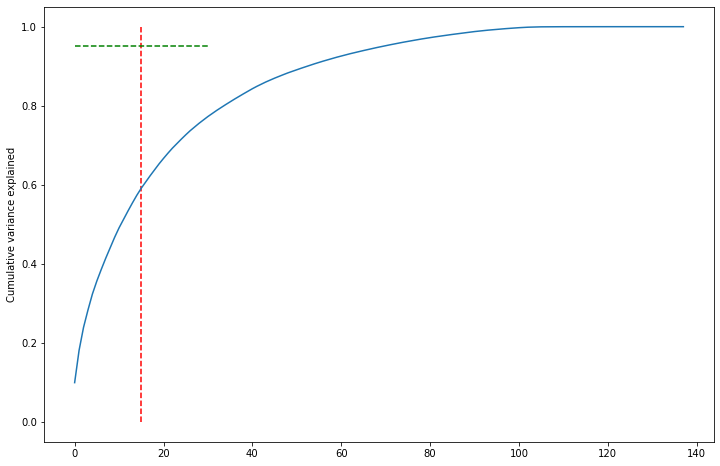

In [134]:
# Plotting the cummulative variance
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### Perform PCA with 16 components

In [135]:
# Importing the library
from sklearn.decomposition import IncrementalPCA

In [136]:
# Passing the number of PCA components we want
pca_final = IncrementalPCA(n_components=16)

In [137]:
# Fitting the training data
df_train_pca = pca_final.fit_transform(X_train)

In [138]:
# Shape
df_train_pca.shape

(38528, 16)

In [139]:
# Creating a correlation matrix
corrmat = np.corrcoef(df_train_pca.transpose())

#### Plotting the heatmap of the corr matrix

<AxesSubplot:>

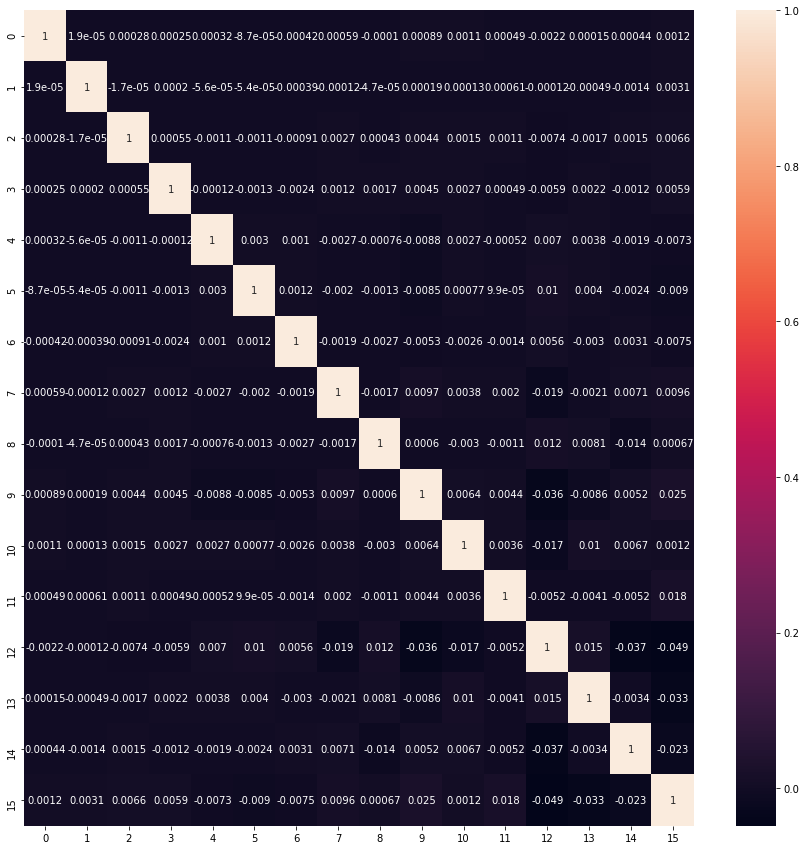

In [140]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

#### Applying the transformation on the test set

In [141]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(16512, 16)

### Applying logistic regression on the data on our Principal components

In [142]:
# Importing library
from sklearn.linear_model import LogisticRegression

In [143]:
# Creating model object
learner_pca = LogisticRegression()

In [144]:
# Fitting the model
model_pca = learner_pca.fit(df_train_pca, y_train)

In [145]:
# Making predictions
pred_test = model_pca.predict(df_test_pca)

In [146]:
# Accuracy Score
accuracy_score(y_test, pred_test)

0.7983890503875969

In [147]:
# Recall Score
recall_score(y_test, pred_test)

0.8215406906544312

In [148]:
# Precision Score
precision_score(y_test, pred_test)

0.7861351819757366

In [149]:
# Classification Report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      8230
           1       0.79      0.82      0.80      8282

    accuracy                           0.80     16512
   macro avg       0.80      0.80      0.80     16512
weighted avg       0.80      0.80      0.80     16512



In [150]:
# Roc_auc_score
roc_auc_score(y_test, pred_test)

0.7983159103332909

### Applying Xgboost on the data of our principle components

#### Without Hyperparameter tuning

In [151]:
# Importing the library
import xgboost as xgb
xgclf = xgb.XGBClassifier()
xgclf.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [152]:
df_train_pca.shape

(38528, 16)

In [153]:
# Making prediction
predict = xgclf.predict(df_test_pca)

In [154]:
# Recall Score
recall_score(y_test, predict)

0.91294373339773

#### We can see that recall score has improved significantly after using Xgboost

In [155]:
# Precision Score
precision_score(y_test, predict)

0.8721882570077287

In [156]:
# Classification Model
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      8230
           1       0.87      0.91      0.89      8282

    accuracy                           0.89     16512
   macro avg       0.89      0.89      0.89     16512
weighted avg       0.89      0.89      0.89     16512



#### With hyperparameter tuning

In [157]:
# Using Grid Search CV for hyperparameter tuning
from sklearn import metrics
from sklearn import model_selection

xgb_model = xgb.XGBClassifier()

parameters = {'max_depth': [4, 6, 8],
              'min_child_weight': [1,2,3],
              'n_estimators': [80,100,120]}

scorer = metrics.make_scorer(metrics.recall_score,
                             greater_is_better=True,
                             needs_proba=False,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=3,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [158]:
# Getting the values of hyperparameters
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

{'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 120}
0.9261872531158036
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [159]:
# Using the hyperparameters
clf_xgb = xgb.XGBClassifier(max_depth = 8, min_child_weight = 2, n_estimators = 120)
clf_xgb.fit(df_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=8,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [160]:
# Making Prediction using tunned hyperparameter
predict = clf_xgb.predict(df_test_pca)

In [161]:
# Recall Score
recall_score(y_test, predict)

0.9397488529340738

In [162]:
# Precison Score
precision_score(y_test, predict)

0.8924435271184498

In [163]:
# Accuracy score
accuracy_score(y_test, predict)

0.9129723837209303

In [164]:
# Classification Report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      8230
           1       0.89      0.94      0.92      8282

    accuracy                           0.91     16512
   macro avg       0.91      0.91      0.91     16512
weighted avg       0.91      0.91      0.91     16512



#### We are getting a recall score of 0.94 and accuracy score of 0.91

# Conclusion

In [165]:
# Features that can be used to predict the churners better
col3

['arpu_7',
 'onnet_mou_8',
 'total_og_mou_8',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'av_rech_amt_data_8',
 'monthly_2g_8',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_8',
 'total_rech_data_amt_8']

#### We can see that the 8th month is very important to predict if a customer will churn or not therefore customers with less data recharge amount, revenue_per_user, monthly_3g consumption should be considered as the customers likely to churn. Therefore company should pay extra attension on such cusotmers and introduce exciting schemes for them. 

In [166]:
# Save the Model
import joblib

# Save the model as a pickle in a file 
joblib.dump(logistic, 'logistic_model.pkl') 

# Load the model from the file 
#losgistic_model = joblib.load('logistic_model.pkl')

['logistic_model.pkl']

In [167]:
X_train[col3].columns

Index(['arpu_7', 'onnet_mou_8', 'total_og_mou_8', 'total_ic_mou_7',
       'total_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'av_rech_amt_data_8', 'monthly_2g_8', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_8', 'total_rech_data_amt_8'],
      dtype='object')

In [168]:
X_train[col3].head()

,arpu_7,onnet_mou_8,total_og_mou_8,total_ic_mou_7,total_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,av_rech_amt_data_8,monthly_2g_8,monthly_3g_7,monthly_3g_8,sachet_3g_8,total_rech_data_amt_8
33036,-0.203642,-0.263318,-0.625665,-0.662414,-0.589322,-0.423606,-0.511127,-0.478552,-0.273394,-0.296133,-0.261656,-0.144886,-0.230894
2428,2.092335,11.627862,7.208641,0.149489,0.307986,8.250812,0.523375,-0.478552,-0.273394,-0.296133,-0.261656,-0.144886,-0.230894
23076,0.322981,-0.376661,0.486025,0.183423,0.178555,1.624521,-0.272396,-0.478552,-0.273394,-0.296133,-0.261656,-0.144886,-0.230894
5204,1.130268,-0.386537,-0.600844,-0.228912,-0.574878,-0.544084,-0.113242,-0.478552,-0.273394,-0.296133,-0.261656,-0.144886,-0.230894
24830,-0.008575,0.280701,0.665475,-0.730469,-0.589322,-0.785040,3.507516,-0.478552,-0.273394,-0.296133,-0.261656,-0.144886,-0.230894
